In [ ]:
This is cool because I figured out how to iterate generating of frquencies for audio file, and, I am now using python
to manipulate raw data - no need to go through excel.

In [1]:
#import 1880 file, do conversions in python
import csv
with open('temp since 1880.csv', 'r') as f:
    reader = csv.reader(f)
    sonif1 = list(reader)

In [2]:
#to convert entries from imported csv files to integers and floats
years = [int(row[0]) for row in sonif1]
temp = [float(row[1]) for row in sonif1]
freq = [float(row[2]) for row in sonif1] #this freq column becomes unecessary if python is used to generate freqs
#as is done below

In [3]:
#this is to convert temp anomalies in hundredth deg. C deviations from 1951-1980 global avg (57.2 deg F)
#to absolut deg F
temps = [(x/100 * 1.8)+57.2 for x in temp]

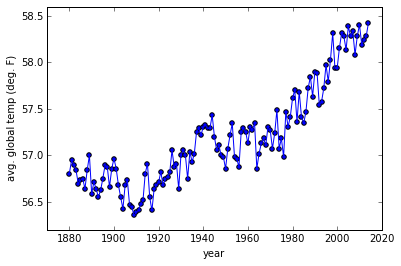

In [4]:
#to import the appropriate tools for graphing
import matplotlib.pyplot as plt
import numpy as np

#for some reason, this seems to be necessary code as well
%matplotlib inline

x = years
y = temps
plt.ylabel('avg. global temp (deg. F)')
plt.xlabel('year')

#adds line to scatterplot
line, = plt.plot(x, y, '-')
#defines range of each axis
plt.axis([1870, 2020, 56.2, 58.6])
#defines plot type (the term 'plot' will give line)
plt.scatter(x, y)
#shows the graph
plt.show()


In [5]:
#this is the code for setting the desired range in frequencies for sound graph
mintemp = min(temp)
maxtemp = max(temp)
temprange = maxtemp-mintemp
#enter whatever freqs you want here
minfreq = int(input('Enter the minimum frequency: '))
maxfreq = int(input('Enter the maximum frequency: '))
freqrange = maxfreq-minfreq
temprange, freqrange

Enter the minimum frequency: 110
Enter the maximum frequency: 2200


(115.0, 2090)

In [6]:
#this is the code for computing the desired freq range and putting it into soundrange file for making wav file
zerotoone = [(x-mintemp)/(temprange) for x in temp]
soundrange = [x*(freqrange)+minfreq for x in zerotoone]
soundrange[0], soundrange[134]

(564.3478260869565, 2200.0)

In [ ]:
#this code no longer works since updating python. i'll try to fix below - NO LUCK
#I installed python 2.7 on another machine and it works there
#SyntaxError: invalid syntax
#this is the working loop code
import math
import wave
import struct

#data_size controls how long each note plays
data_size = 10000
fname = "endyears.wav"
frate = 11025.0  # framerate as a float
amp = 4000.0     # multiplier for amplitude
amp2 = 10000.0
amp3 = 64000.0
    
wav_file = wave.open(fname, "w")

nchannels = 2
sampwidth = 2
framerate = int(frate)
nframes = data_size
comptype = "NONE"
compname = "not compressed"

wav_file.setparams((nchannels, sampwidth, framerate, nframes,
    comptype, compname))

freqintro = 10 #this is a low freq inaudible note for space at the beginning
sine_list_xintro = []
for xintro in range(data_size):
    sine_list_xintro.append(math.sin(2*math.pi*freqintro*(xintro/frate)))
for s in sine_list_xintro:
    # write the audio frames to file
    wav_file.writeframes(struct.pack('h', int(s*amp3/2)))
    
#this is the loop that allows entry of variable number of data points. key is the csv file read into sonif1.
#data being sonified in this example appear in the third column of the csv file.
n = int(input('Enter the start row: '))
print('your start year is:')
print(years[n])
p = int(input('Enter the end row: '))
print('your end year is:')
print(years[p])
for i in range(n, p):
    x=0+i
    freqx = float(soundrange[x])
    #print(freqx)
    #print(x)
    #print(i)
    sine_list_i = []
    for x in range(data_size):
        sine_list_i.append(math.sin(2*math.pi*freqx*(x/frate)))
    for s in sine_list_i:
        # write the audio frames to file
        wav_file.writeframes(struct.pack('h', int(s*amp3/2)))
        
freqintro = 10 #this will add silence before final end tone
sine_list_xintro = []
for xintro in range(data_size):
    sine_list_xintro.append(math.sin(2*math.pi*freqintro*(xintro/frate)))
for s in sine_list_xintro:
    # write the audio frames to file
    wav_file.writeframes(struct.pack('h', int(s*amp3/2)))

#this will play the last tone one extra time
for x in range(data_size*10):
    sine_list_i.append(math.sin(2*math.pi*freqx*(x/frate)))
for s in sine_list_i:
    # write the audio frames to file
    wav_file.writeframes(struct.pack('h', int(s*amp3/2)))
        
wav_file.close()

In [8]:
#this code no longer works since updating python. i'll try to fix below
#SyntaxError: invalid syntax
#this is the working loop code
import math
import wave
import struct

#data_size controls how long each note plays
data_size = 2000
fname = "warmingsince1880fromloopcodeREALLYFASTvers2.wav"
frate = 11025.0  # framerate as a float
amp = 4000.0     # multiplier for amplitude
amp2 = 10000.0
amp3 = 64000.0
    
wav_file = wave.open(fname, "w")

nchannels = 2
sampwidth = 2
framerate = int(frate)
nframes = data_size
comptype = "NONE"
compname = "not compressed"

wav_file.setparams((nchannels, sampwidth, framerate, nframes,
    comptype, compname))

freqintro = 10 #this is a low freq inaudible note for space at the beginning
sine_list_xintro = []
for xintro in range(data_size*2):
    sine_list_xintro.append(math.sin(2*math.pi*freqintro*(xintro/frate)))
for s in sine_list_xintro:
    # write the audio frames to file
    wav_file.writeframes(struct.pack('h', int(s*amp3/2)))
    
#this is the loop that allows entry of variable number of data points. key is the csv file read into sonif1.
#data being sonified in this example appear in the third column of the csv file.
n = int(input('Enter the number of data points: '))
for i in range(n):
    x=0+i
    freqx = float(soundrange[x])
    #print(freqx)
    #print(x)
    #print(i)
    sine_list_i = []
    for x in range(data_size):
        sine_list_i.append(math.sin(2*math.pi*freqx*(x/frate)))
    for s in sine_list_i:
        # write the audio frames to file
        wav_file.writeframes(struct.pack('h', int(s*amp3/2)))

#this will play the last tone one extra time
for s in sine_list_i:
    # write the audio frames to file
    wav_file.writeframes(struct.pack('h', int(s*amp3/2)))
        
wav_file.close()

NameError: name 'basestring' is not defined

In [11]:
#this code no longer works since updating python. i'll try to fix below
#SyntaxError: invalid syntax
#this is the working loop code
import math
import wave
import struct

#data_size controls how long each note plays
data_size = 2000
fname = "warmingsince1880fromloopcodeREALLYFASTvers2.wav"
frate = 11025.0  # framerate as a float
amp = 4000.0     # multiplier for amplitude
amp2 = 10000.0
amp3 = 64000.0
    
#wav_file = wave.open(fname, "w")
wave.open("warmingsince1880fromloopcodeREALLYFASTvers2.wav", 'wb')

nchannels = 2
sampwidth = 2
framerate = int(frate)
nframes = data_size
comptype = "NONE"
compname = "not compressed"

wav_file.setparams((nchannels, sampwidth, framerate, nframes,
    comptype, compname))

freqintro = 10 #this is a low freq inaudible note for space at the beginning
sine_list_xintro = []
for xintro in range(data_size*2):
    sine_list_xintro.append(math.sin(2*math.pi*freqintro*(xintro/frate)))
for s in sine_list_xintro:
    # write the audio frames to file
    wav_file.writeframes(struct.pack('h', int(s*amp3/2)))
    
#this is the loop that allows entry of variable number of data points. key is the csv file read into sonif1.
#data being sonified in this example appear in the third column of the csv file.
n = int(input('Enter the number of data points: '))
for i in range(n):
    x=0+i
    freqx = float(soundrange[x])
    #print(freqx)
    #print(x)
    #print(i)
    sine_list_i = []
    for x in range(data_size):
        sine_list_i.append(math.sin(2*math.pi*freqx*(x/frate)))
    for s in sine_list_i:
        # write the audio frames to file
        wav_file.writeframes(struct.pack('h', int(s*amp3/2)))

#this will play the last tone one extra time
for s in sine_list_i:
    # write the audio frames to file
    wav_file.writeframes(struct.pack('h', int(s*amp3/2)))
        
wav_file.close()

NameError: name 'basestring' is not defined

In [9]:
#I'M GOING TO TRY TO FIX IT BY RUNNING SUBPARTS AND SEE WHERE THE ERROR STARTS
#even though this code worked on 7/3, it's not working now on 7/5
#i get the following error:  File "C:\Users\singler\wave.py", line 130
#    raise Error, 'file does not start with RIFF id'
#               ^
#SyntaxError: invalid syntax
#this is the working loop code
import math
import wave
import struct

#data_size controls how long each note plays
data_size = 2000
fname = "warmingsince1880fromloopcodeREALLYFASTvers2.wav"
frate = 11025.0  # framerate as a float
amp = 4000.0     # multiplier for amplitude
amp2 = 10000.0
amp3 = 64000.0
    
wav_file = wave.open(fname, "w")

SyntaxError: invalid syntax (wave.py, line 130)

In [15]:
#I'M GOING TO TRY TO FIX IT BY RUNNING SUBPARTS AND SEE WHERE THE ERROR STARTS
#even though this code worked on 7/3, it's not working now on 7/5
#i get the following error:  File "C:\Users\singler\wave.py", line 130
#    raise Error, 'file does not start with RIFF id'
#               ^
#SyntaxError: invalid syntax
#this is the working loop code
import math
import wav
import struct

ImportError: No module named 'wav'

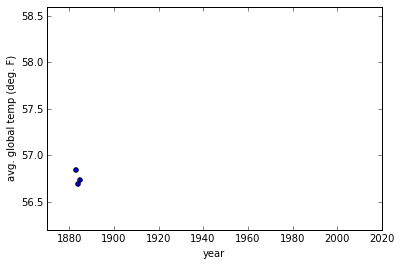

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import time

#import 1880 file, do conversions in python
import csv
with open('temp since 1880.csv', 'r') as f:
    reader = csv.reader(f)
    sonif1 = list(reader)
    
#to convert entries from imported csv files to integers and floats
years = [int(row[0]) for row in sonif1]
temp = [float(row[1]) for row in sonif1]
freq = [float(row[2]) for row in sonif1] #this freq column becomes unecessary if python is used to generate freqs
#as is done below

#this is to convert temp anomalies in hundredth deg. C deviations from 1951-1980 global avg (57.2 deg F)
#to absolut deg F
temps = [(x/100 * 1.8)+57.2 for x in temp]

#to import the appropriate tools for graphing
import matplotlib.pyplot as plt
import numpy as np
import winsound

#for some reason, this seems to be necessary code as well
%matplotlib inline

#x = years
#y = temps
#winsound.PlaySound('warmingsince1880fromloopcode.wav', winsound.SND_FILENAME)
f, ax = plt.subplots()
plt.ylabel('avg. global temp (deg. F)')
plt.xlabel('year')
#plt.figure(figsize=(14, 4), dpi=500)
n = int(input('Enter the start row: '))
print('your start year is:')
print(years[n])
p = int(input('Enter the end row: '))
print('your end year is:')
print(years[p])
for n in range(n,p):
    ax.scatter(years[n+1], temps[n+1])
    #time.sleep(0.1)
    winsound.Beep(list(map(int, soundrange))[n],100)
    time.sleep(0.2)
    #ax.plot(years[n], temps[n], '.r-')
    clear_output(wait=True)
    plt.axis([1870, 2020, 56.2, 58.6])
    display(f)
plt.close()
#adds line to scatterplot
#line, = plt.plot(x, y, '-')
#defines range of each axis
#plt.axis([1870, 2020, 56.2, 58.6])
#defines plot type (the term 'plot' will give line)
#plt.scatter(x, y)
#shows the graph
#plt.show()

# close the figure at the end, so we don't get a duplicate
# of the last plot
plt.close()

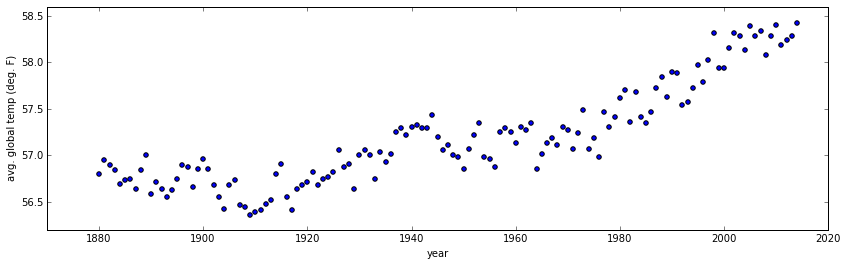

Figure 1. Average global temperature from 1880 to 2014 in degrees F.
 
 
 
Audio "sound graph" that corresponds to Figure 1.


In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.special import jn
from IPython.display import display, clear_output
plt.figure(figsize=(14, 4), dpi=500)
x = years
y = temps
#n = int(input('Enter the number of data points: '))
#for i in range(n):
#z = i+1
plt.figure(figsize=(14, 4), dpi=500)
plt.ylabel('avg. global temp (deg. F)')
plt.xlabel('year')
    #line, = plt.plot(years[z], temps[z], '-')
    #line, = plt.plot(years[z+1], temps[z+1], '-')
plt.axis([1870, 2020, 56.2, 58.6])
    #plt.scatter(years[z], temps[z])
    #plt.scatter(years[z+1], temps[z+1])
plt.scatter(years, temps)
print (' ')
print (' ')
plt.show()
print ('Figure 1. Average global temperature from 1880 to 2014 in degrees F.')
print (' ')
print (' ')
print (' ')
    
print ('Audio "sound graph" that corresponds to Figure 1.')
import IPython #this plays audio file, frequency range set above
IPython.display.Audio("warmingsince1880fromloopcode.wav")

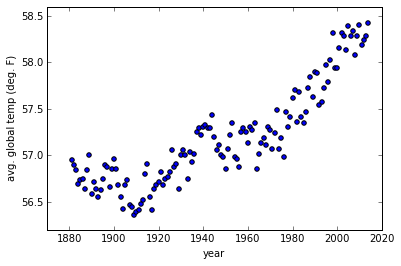

IndexError: list index out of range

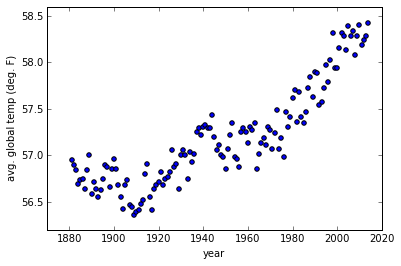

In [18]:
#import 1880 file, do conversions in python
import csv
with open('temp since 1880.csv', 'r') as f:
    reader = csv.reader(f)
    sonif1 = list(reader)
    
#to convert entries from imported csv files to integers and floats
years = [int(row[0]) for row in sonif1]
temp = [float(row[1]) for row in sonif1]
freq = [float(row[2]) for row in sonif1] #this freq column becomes unecessary if python is used to generate freqs
#as is done below

#this is to convert temp anomalies in hundredth deg. C deviations from 1951-1980 global avg (57.2 deg F)
#to absolut deg F
temps = [(x/100 * 1.8)+57.2 for x in temp]

#to import the appropriate tools for graphing
import matplotlib.pyplot as plt
import numpy as np
import winsound

#for some reason, this seems to be necessary code as well
%matplotlib inline

#x = years
#y = temps
#winsound.PlaySound('warmingsince1880fromloopcode.wav', winsound.SND_FILENAME)
f, ax = plt.subplots()
plt.ylabel('avg. global temp (deg. F)')
plt.xlabel('year')
#plt.figure(figsize=(14, 4), dpi=500)
for n in range(0,134):
    ax.scatter(years[n+1], temps[n+1])
    #time.sleep(0.1)
    winsound.Beep(list(map(int, soundrange))[n],100)
    time.sleep(0.2)
    #ax.plot(years[n], temps[n], '.r-')
    clear_output(wait=True)
    plt.axis([1870, 2020, 56.2, 58.6])
    display(f)
plt.close()
#adds line to scatterplot
#line, = plt.plot(x, y, '-')
#defines range of each axis
#plt.axis([1870, 2020, 56.2, 58.6])
#defines plot type (the term 'plot' will give line)
#plt.scatter(x, y)
#shows the graph
#plt.show()

# close the figure at the end, so we don't get a duplicate
# of the last plot
plt.close()

In [24]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
a[2:9:3] # [start:end:step]

array([2, 5, 8])

In [27]:
b = np.arange(10)

In [28]:
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

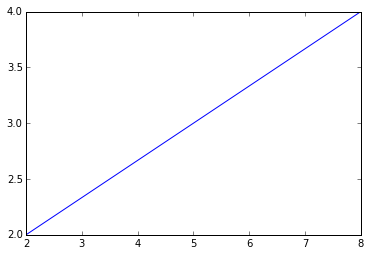

In [39]:
c = a[2:9:3]
d = b[2:5:1]
plt.plot(c,d)

In [7]:
import numpy as np
yearsa = np.asarray(years)
tempsa = np.asarray(temps)

Enter the start row: 122
your start year is:
2002
Enter the end row: 134
your end year is:
2014


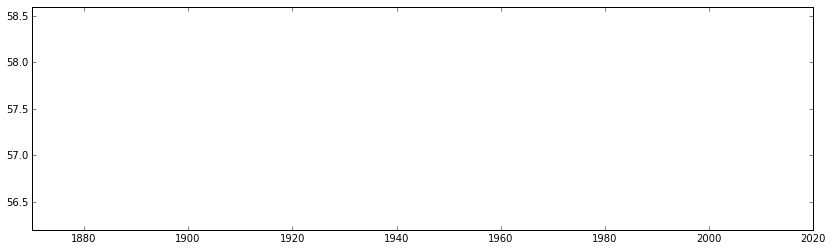

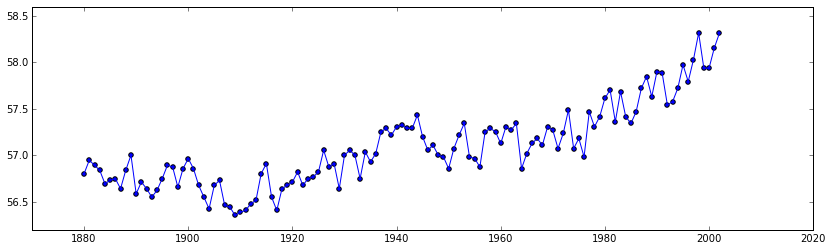

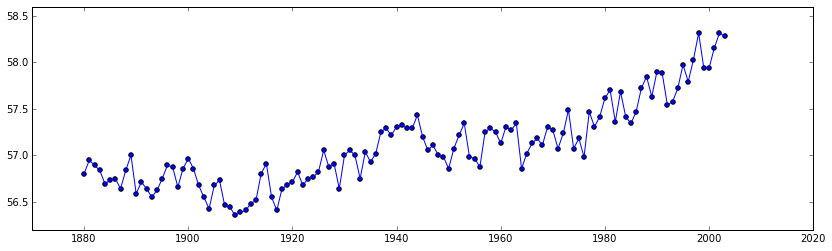

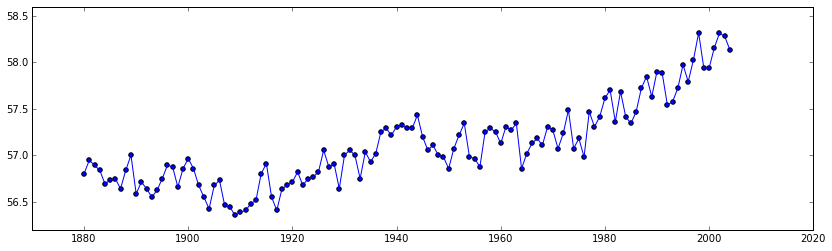

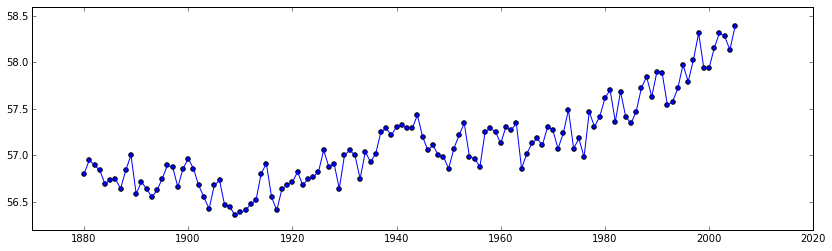

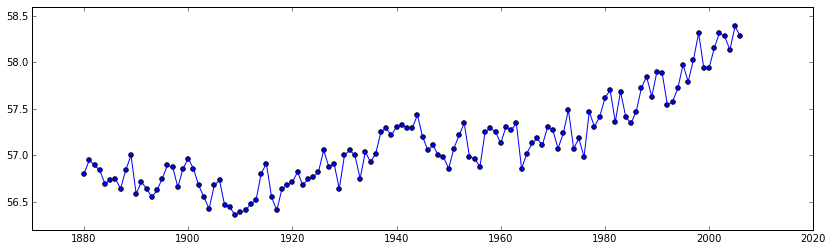

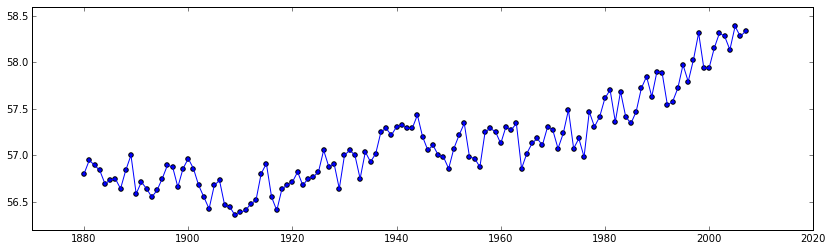

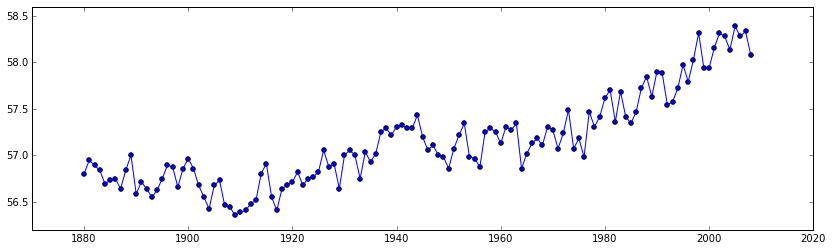

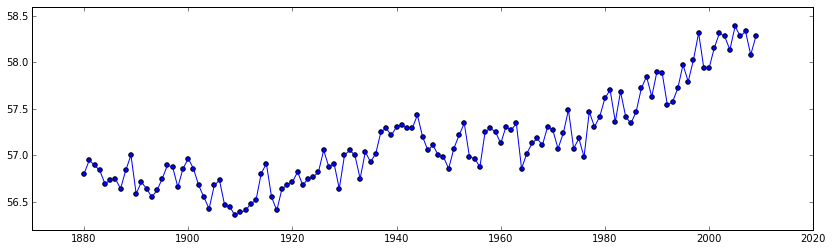

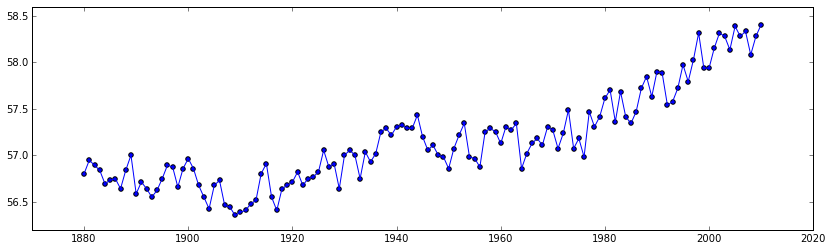

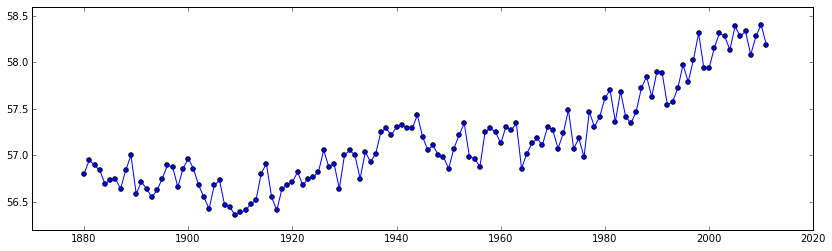

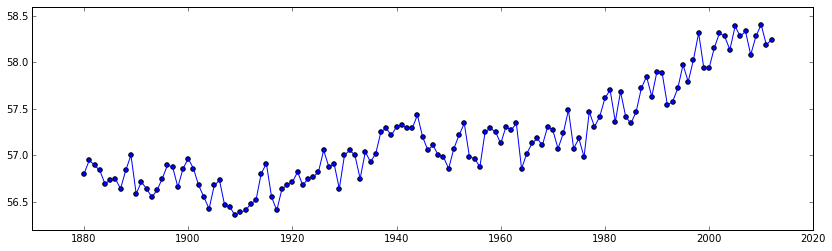

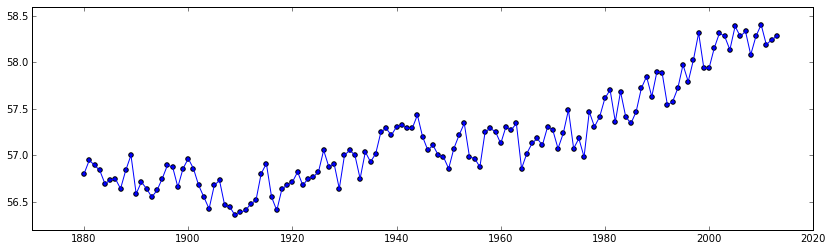

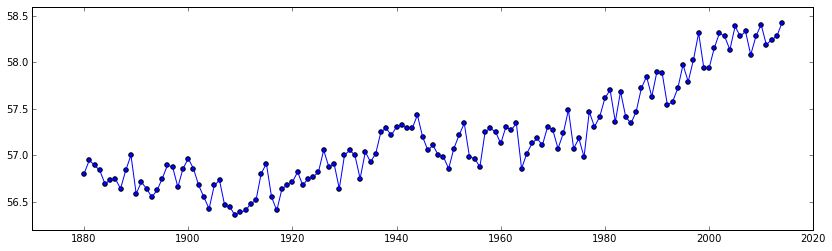

In [50]:
#CODE FOR BUILDING PNG FILES TO USE FOR ANIMATION
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import ode
#for some reason, this seems to be necessary code as well
%matplotlib inline

yearsa = np.asarray(years)
tempsa = np.asarray(temps)

n = int(input('Enter the start row: '))
print('your start year is:')
print(years[n])
p = int(input('Enter the end row: '))
print('your end year is:')
print(years[p])
#to print blank axis
firsty = yearsa[0:0:1]
firstt = tempsa[0:0:1]
plt.figure(figsize=(14, 4), dpi=500)
plt.axis([1870, 2020, 56.2, 58.6])
plt.plot(firsty, firstt)
plt.scatter(firsty, firstt)
fname = '_slice%03d.png' %0 # file name
savefig(fname)
for i in range(n,p):
    y=i+1
    firsty = yearsa[0:y:1]
    firstt = tempsa[0:y:1]
    plt.figure(figsize=(14, 4), dpi=500)
    plt.axis([1870, 2020, 56.2, 58.6])
    plt.plot(firsty, firstt)
    plt.scatter(firsty, firstt)
    fname = '_slice%03d.png' %i # file name
    savefig(fname)
z = i+2
firsty = yearsa[0:z:1]
firstt = tempsa[0:z:1]
plt.figure(figsize=(14, 4), dpi=500)
plt.axis([1870, 2020, 56.2, 58.6])
plt.plot(firsty, firstt)
plt.scatter(firsty, firstt)
fname = '_slice%03d.png' %z # file name
savefig(fname)

In [19]:
n = int(input('Enter the start row: '))
print('your start year is:')
print(years[n])
p = int(input('Enter the end row: '))
print('your end year is:')
print(years[p])
print('start')
#for some reason this is needed to get the last entry
q=p+1
for i in range(n,q):
    print(years[i])

print('got them all')
print(years[p])

Enter the start row: 130
your start year is:
2010
Enter the end row: 134
your end year is:
2014
start
2010
2011
2012
2013
2014
got them all
2014


In [48]:
years[120]

2000

In [39]:
for i in range(10):
   f = open("file_"+str(i)+".dat","w")

In [41]:
#to generate new file names in a loop
for i in range(10):
    f = open("file_"+str(i)+".dat","w")
    print(f)

<_io.TextIOWrapper name='file_0.dat' mode='w' encoding='cp1252'>
<_io.TextIOWrapper name='file_1.dat' mode='w' encoding='cp1252'>
<_io.TextIOWrapper name='file_2.dat' mode='w' encoding='cp1252'>
<_io.TextIOWrapper name='file_3.dat' mode='w' encoding='cp1252'>
<_io.TextIOWrapper name='file_4.dat' mode='w' encoding='cp1252'>
<_io.TextIOWrapper name='file_5.dat' mode='w' encoding='cp1252'>
<_io.TextIOWrapper name='file_6.dat' mode='w' encoding='cp1252'>
<_io.TextIOWrapper name='file_7.dat' mode='w' encoding='cp1252'>
<_io.TextIOWrapper name='file_8.dat' mode='w' encoding='cp1252'>
<_io.TextIOWrapper name='file_9.dat' mode='w' encoding='cp1252'>


In [32]:
#CAN I AUTOMATE THIS
#FOR CONVERTING PNGS TO GIFS SO THEY CAN BE PUT TOGETHER FOR ANIMATION
snames[n]   
from moviepy.editor import *
from PIL import Image
S0 = ImageClip("_slice000.png") # has infinite duration
for n in range(1,2):
    snamesa[n] = ImageClip("_slice00"+str(n)+".png")
snamesa[n]    
#S2.set_duration(4).write_videofile("123456.avi",fps=24, codec='mpeg4')
#o = 1234    
#1.set_duration(1).write_videofile("S"+str(o)+".avi",fps=24, codec='mpeg4')
#1.set_duration(1).write_videofile("1234.avi",fps=24, codec='mpeg4')

#S8 = ImageClip("_slice086.png") # has infinite duration
#S100.set_duration(4).write_videofile("12345.avi",fps=24, codec='mpeg4')

#S86 = ImageClip("_slice086.png") # has infinite duration
#S87 = ImageClip("_slice087.png") # has infinite duration
#S88 = ImageClip("_slice088.png") # has infinite duration

array(['<m'], 
      dtype='<U2')

In [31]:
snames

[['S1'],
 ['S3'],
 ['S4'],
 ['S5']]

In [29]:
#import string names
import csv
with open('snames.csv', 'r') as f:
    reader = csv.reader(f)
    snames = list(reader)
snames[1]

['S2']

In [26]:
#convert string names to array
import numpy as np
snamesa = np.asarray(snames)
snamesa

array([['S1'],
       ['S2'],
       ['S3'],
       ['S4'],
       ['S5']], 
      dtype='<U2')

In [6]:
slices = ['_slice101.png', '_slice102.png']
slices
import numpy as np
slicesa = np.asarray(slices)
slicesa

array(['_slice101.png', '_slice102.png'], 
      dtype='<U13')

In [11]:
#this will easily put lots of pictures together, but, i don't know how to control duration of each image
from moviepy.editor import *
from PIL import Image
clip = ImageSequenceClip(slices, fps=25).set_duration(6)
clip.write_videofile("sequence2.avi",fps=24, codec='mpeg4')

[MoviePy] >>>> Building video sequence2.avi
[MoviePy] Writing video sequence2.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: sequence2.avi 



In [47]:
#this is the solution! I don't need individual clip names - it just re-sets.
for n in range(94,97):
    myclip = ImageClip("_slice0"+str(n)+".png")
    myclip.set_duration(2).write_videofile("testeasy"+str(n)+".avi",fps=24, codec='mpeg4') # works !

[MoviePy] >>>> Building video testeasy94.avi
[MoviePy] Writing video testeasy94.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: testeasy94.avi 

[MoviePy] >>>> Building video testeasy95.avi
[MoviePy] Writing video testeasy95.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: testeasy95.avi 

[MoviePy] >>>> Building video testeasy96.avi
[MoviePy] Writing video testeasy96.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: testeasy96.avi 



In [2]:
#to create an empty list
conseq = [None] * 100

In [3]:
#this is it! enter the videofile clip avi files into a list, use that list to concatenate!
from moviepy.editor import *
from PIL import Image
for n in range(94,97):
    conseq[n] = VideoFileClip("testeasy"+str(n)+".avi")
    
conseq[94:97]

  warn(skimage_deprecation('The `skimage.filter` module has been renamed '



In [35]:
consequ = [VideoFileClip("decadeone.avi"), VideoFileClip("decadetwo.avi")]
consequ

In [4]:
#THIS WORKS WHEN THE CLIP NAMES ARE IN A LIST - yesss! - above they were put into conseq - here we slice it
video = concatenate(conseq[94:97])

# Write the result to a file
video.write_videofile("consequj.avi",fps=24, codec='mpeg4')

[MoviePy] >>>> Building video consequj.avi
[MoviePy] Writing video consequj.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: consequj.avi 



In [15]:
cipzone = VideoFileClip("decadeone.avi")
cipztwo = VideoFileClip("decadetwo.avi")
cipzthree = VideoFileClip("decadethree.avi")
cipzfour = VideoFileClip("decadefour.avi")
cipzfive = VideoFileClip("decadefive.avi")

In [16]:
consequ2 = [cipzone, cipztwo]
consequ2

In [20]:
#THIS WORKS WHEN THE CLIP NAMES ARE IN A LIST - SO, THE ONLY THING TO SOLVE IS ITERATING THE GENERATION OF NEW CLIP NAMES
#AND PUTTING THEM INTO A LIST THAT CAN THEN BE CALLED UP FOR CONCATENATION
video = concatenate(consequ2)

# Write the result to a file
video.write_videofile("consequc.avi",fps=24, codec='mpeg4')

[MoviePy] >>>> Building video consequc.avi
[MoviePy] Writing video consequc.avi
|###-------| 75/229  32% [elapsed: 00:00 left: 00:01, 149.39 iters/sec]

  UserWarning)



[MoviePy] Done.
[MoviePy] >>>> Video ready: consequc.avi 



In [40]:
n=1
(str(n)+"myclip")
str((str(n)+"myclip"))
print(str((str(n)+"myclip"))

SyntaxError: unexpected EOF while parsing (<ipython-input-40-633fc256a43b>, line 4)

In [37]:
string = 'abcd'
for x in string:
    print(x)
    x = ImageClip("_slice001.png")
    #str(n) = ImageClip("_slice0"+str(n)+".png")
    
#c.set_duration(1).write_videofile("ctest.avi",fps=24, codec='mpeg4') # works !

a
b
c
d


In [1]:
#FOR CONVERTING PNGS TO GIFS SO THEY CAN BE PUT TOGETHER FOR ANIMATION
from moviepy.editor import *
from PIL import Image

S133 = ImageClip("_slice133.png") # has infinite duration
S134 = ImageClip("_slice134.png") # has infinite duration
S135 = ImageClip("_slice135.png") # has infinite duration

#blend = concatenate([test2, test3]) # for some reason this doesn't work

S133.set_duration(1).write_videofile("S133.avi",fps=24, codec='mpeg4') # works !
S134.set_duration(1).write_videofile("S134.avi",fps=24, codec='mpeg4') # works !
S135.set_duration(6).write_videofile("S135.avi",fps=24, codec='mpeg4') # works !

  warn(skimage_deprecation('The `skimage.filter` module has been renamed '



[MoviePy] >>>> Building video S133.avi
[MoviePy] Writing video S133.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: S133.avi 

[MoviePy] >>>> Building video S134.avi
[MoviePy] Writing video S134.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: S134.avi 

[MoviePy] >>>> Building video S135.avi
[MoviePy] Writing video S135.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: S135.avi 



In [51]:
#FOR CONVERTING PNGS TO GIFS SO THEY CAN BE PUT TOGETHER FOR ANIMATION
from moviepy.editor import *
from PIL import Image
S0 = ImageClip("_slice000.png") # has infinite duration
S85 = ImageClip("_slice085.png") # has infinite duration
S86 = ImageClip("_slice086.png") # has infinite duration
S87 = ImageClip("_slice087.png") # has infinite duration
S88 = ImageClip("_slice088.png") # has infinite duration
S89 = ImageClip("_slice089.png") # has infinite duration
S90 = ImageClip("_slice090.png") # has infinite duration
S91 = ImageClip("_slice091.png") # has infinite duration
S92 = ImageClip("_slice092.png") # has infinite duration
S93 = ImageClip("_slice093.png") # has infinite duration
S94 = ImageClip("_slice094.png") # has infinite duration
S95 = ImageClip("_slice095.png") # has infinite duration
S96 = ImageClip("_slice096.png") # has infinite duration
S97 = ImageClip("_slice097.png") # has infinite duration
S98 = ImageClip("_slice098.png") # has infinite duration
S99 = ImageClip("_slice099.png") # has infinite duration
S100 = ImageClip("_slice100.png") # has infinite duration
S101 = ImageClip("_slice101.png") # has infinite duration
S102 = ImageClip("_slice102.png") # has infinite duration
S103 = ImageClip("_slice103.png") # has infinite duration
S104 = ImageClip("_slice104.png") # has infinite duration
S105 = ImageClip("_slice105.png") # has infinite duration
S106 = ImageClip("_slice106.png") # has infinite duration
S107 = ImageClip("_slice107.png") # has infinite duration
S108 = ImageClip("_slice108.png") # has infinite duration
S109 = ImageClip("_slice109.png") # has infinite duration
S110 = ImageClip("_slice110.png") # has infinite duration
S111 = ImageClip("_slice111.png") # has infinite duration
S112 = ImageClip("_slice112.png") # has infinite duration
S113 = ImageClip("_slice113.png") # has infinite duration
S114 = ImageClip("_slice114.png") # has infinite duration
S115 = ImageClip("_slice115.png") # has infinite duration
S116 = ImageClip("_slice116.png") # has infinite duration
S117 = ImageClip("_slice117.png") # has infinite duration
S118 = ImageClip("_slice118.png") # has infinite duration
S119 = ImageClip("_slice119.png") # has infinite duration
S120 = ImageClip("_slice120.png") # has infinite duration
S121 = ImageClip("_slice121.png") # has infinite duration
S122 = ImageClip("_slice122.png") # has infinite duration
S123 = ImageClip("_slice123.png") # has infinite duration
S124 = ImageClip("_slice124.png") # has infinite duration
S125 = ImageClip("_slice125.png") # has infinite duration
S126 = ImageClip("_slice126.png") # has infinite duration
S127 = ImageClip("_slice127.png") # has infinite duration
S128 = ImageClip("_slice128.png") # has infinite duration
S129 = ImageClip("_slice129.png") # has infinite duration
S130 = ImageClip("_slice130.png") # has infinite duration
S131 = ImageClip("_slice131.png") # has infinite duration
S132 = ImageClip("_slice132.png") # has infinite duration
S133 = ImageClip("_slice133.png") # has infinite duration
S134 = ImageClip("_slice134.png") # has infinite duration
S135 = ImageClip("_slice135.png") # has infinite duration

#blend = concatenate([test2, test3]) # for some reason this doesn't work

S0.set_duration(1).write_videofile("S0.avi",fps=24, codec='mpeg4') # works !
S85.set_duration(1).write_videofile("S85.avi",fps=24, codec='mpeg4') # works !
S86.set_duration(1).write_videofile("S86.avi",fps=24, codec='mpeg4') # works !
S87.set_duration(1).write_videofile("S87.avi",fps=24, codec='mpeg4') # works !
S88.set_duration(1).write_videofile("S88.avi",fps=24, codec='mpeg4') # works !
S89.set_duration(1).write_videofile("S89.avi",fps=24, codec='mpeg4') # works !
S90.set_duration(1).write_videofile("S90.avi",fps=24, codec='mpeg4') # works !
S91.set_duration(1).write_videofile("S91.avi",fps=24, codec='mpeg4') # works !
S92.set_duration(1).write_videofile("S92.avi",fps=24, codec='mpeg4') # works !
S93.set_duration(1).write_videofile("S93.avi",fps=24, codec='mpeg4') # works !
S94.set_duration(1).write_videofile("S94.avi",fps=24, codec='mpeg4') # works !
S95.set_duration(1).write_videofile("S95.avi",fps=24, codec='mpeg4') # works !
S96.set_duration(1).write_videofile("S96.avi",fps=24, codec='mpeg4') # works !
S97.set_duration(1).write_videofile("S97.avi",fps=24, codec='mpeg4') # works !
S98.set_duration(1).write_videofile("S98.avi",fps=24, codec='mpeg4') # works !
S99.set_duration(1).write_videofile("S99.avi",fps=24, codec='mpeg4') # works !
S100.set_duration(1).write_videofile("S100.avi",fps=24, codec='mpeg4') # works !
S101.set_duration(1).write_videofile("S101.avi",fps=24, codec='mpeg4') # works !
S102.set_duration(1).write_videofile("S102.avi",fps=24, codec='mpeg4') # works !
S103.set_duration(1).write_videofile("S103.avi",fps=24, codec='mpeg4') # works !
S104.set_duration(1).write_videofile("S104.avi",fps=24, codec='mpeg4') # works !
S105.set_duration(1).write_videofile("S105.avi",fps=24, codec='mpeg4') # works !
S106.set_duration(1).write_videofile("S106.avi",fps=24, codec='mpeg4') # works !
S107.set_duration(1).write_videofile("S107.avi",fps=24, codec='mpeg4') # works !
S108.set_duration(1).write_videofile("S108.avi",fps=24, codec='mpeg4') # works !
S109.set_duration(1).write_videofile("S109.avi",fps=24, codec='mpeg4') # works !
S110.set_duration(1).write_videofile("S110.avi",fps=24, codec='mpeg4') # works !
S111.set_duration(1).write_videofile("S111.avi",fps=24, codec='mpeg4') # works !
S112.set_duration(1).write_videofile("S112.avi",fps=24, codec='mpeg4') # works !
S113.set_duration(1).write_videofile("S113.avi",fps=24, codec='mpeg4') # works !
S114.set_duration(1).write_videofile("S114.avi",fps=24, codec='mpeg4') # works !
S115.set_duration(1).write_videofile("S115.avi",fps=24, codec='mpeg4') # works !
S116.set_duration(1).write_videofile("S116.avi",fps=24, codec='mpeg4') # works !
S117.set_duration(1).write_videofile("S117.avi",fps=24, codec='mpeg4') # works !
S118.set_duration(1).write_videofile("S118.avi",fps=24, codec='mpeg4') # works !
S119.set_duration(1).write_videofile("S119.avi",fps=24, codec='mpeg4') # works !
S120.set_duration(1).write_videofile("S120.avi",fps=24, codec='mpeg4') # works !
S121.set_duration(1).write_videofile("S121.avi",fps=24, codec='mpeg4') # works !
S122.set_duration(1).write_videofile("S122.avi",fps=24, codec='mpeg4') # works !
S123.set_duration(1).write_videofile("S123.avi",fps=24, codec='mpeg4') # works !
S124.set_duration(1).write_videofile("S124.avi",fps=24, codec='mpeg4') # works !
S125.set_duration(1).write_videofile("S125.avi",fps=24, codec='mpeg4') # works !
S126.set_duration(1).write_videofile("S126.avi",fps=24, codec='mpeg4') # works !
S127.set_duration(1).write_videofile("S127.avi",fps=24, codec='mpeg4') # works !
S128.set_duration(1).write_videofile("S128.avi",fps=24, codec='mpeg4') # works !
S129.set_duration(1).write_videofile("S129.avi",fps=24, codec='mpeg4') # works !
S130.set_duration(1).write_videofile("S130.avi",fps=24, codec='mpeg4') # works !
S131.set_duration(1).write_videofile("S131.avi",fps=24, codec='mpeg4') # works !
S132.set_duration(1).write_videofile("S132.avi",fps=24, codec='mpeg4') # works !
S133.set_duration(1).write_videofile("S133.avi",fps=24, codec='mpeg4') # works !
S134.set_duration(1).write_videofile("S134.avi",fps=24, codec='mpeg4') # works !
S135.set_duration(6).write_videofile("S135.avi",fps=24, codec='mpeg4') # works !

[MoviePy] >>>> Building video S0.avi
[MoviePy] Writing video S0.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: S0.avi 

[MoviePy] >>>> Building video S85.avi
[MoviePy] Writing video S85.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: S85.avi 

[MoviePy] >>>> Building video S86.avi
[MoviePy] Writing video S86.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: S86.avi 

[MoviePy] >>>> Building video S87.avi
[MoviePy] Writing video S87.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: S87.avi 

[MoviePy] >>>> Building video S88.avi
[MoviePy] Writing video S88.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: S88.avi 

[MoviePy] >>>> Building video S89.avi
[MoviePy] Writing video S89.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: S89.avi 

[MoviePy] >>>> Building video S90.avi
[MoviePy] Writing video S90.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: S90.avi 

[MoviePy] >>>> Building video S91.avi
[MoviePy] Writing video S91.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: S91.avi 

[MoviePy] >

In [10]:
#forgot to add last year
from moviepy.editor import *
from PIL import Image
S135 = ImageClip("_slice135.png") # has infinite duration

S135.set_duration(5).write_videofile("S135e.mp4",fps=12, codec='mpeg4') # works !

[MoviePy] >>>> Building video S135e.mp4
[MoviePy] Writing video S135e.mp4
[MoviePy] Done.
[MoviePy] >>>> Video ready: S135e.mp4 



In [24]:
#code to combine decades
from moviepy.editor import *
from PIL import Image
cipzone = VideoFileClip("decadeone.avi")
cipztwo = VideoFileClip("decadetwo.avi")
cipzthree = VideoFileClip("decadethree.avi")
cipzfour = VideoFileClip("decadefour.avi")
cipzfive = VideoFileClip("decadefive.avi")

video = concatenate([cipzone, cipztwo, cipzthree, cipzfour, cipzfive])

audio = AudioFileClip('veryendyears6514.wav')

#video.write_videofile("fivedecadesb.avi",fps=24, codec='mpeg4')
#video.write_gif("testaa.gif",fps=24)
#audio doesn't seem to work with gif
#video.write_gif("teste.gif",fps=24).set_audio(audio)
#video.write_videofile("fivedecadesc.avi",fps=24, codec='mpeg4', audio="endyears.wav")
#video.write_videofile("fivedecadesmptestc.mp4",fps=12, codec='mpeg4')
#AT 12 FPS AND AVI, DECENT QUALITY RESULT, BUT, AVI WON'T EMBED INTO PPT
#THIS WEBSITE WORKED WELL AND NOW I CAN PUT IT IN PPT: http://video.online-convert.com/convert-to-mp4
video.write_videofile("fivedecadesmptestwithsoundavfr12.avi",fps=12, codec='mpeg4', audio="veryendyears6514.wav")

[MoviePy] >>>> Building video fivedecadesmptestwithsoundavfr12.avi
[MoviePy] Writing video fivedecadesmptestwithsoundavfr12.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: fivedecadesmptestwithsoundavfr12.avi 



In [ ]:
#THIS WORKS TO ANIMATE
#successfully added sound. taking the clip from 0,0.45 and generating wav with data_size 10000 and frate 11025.0
#give pretty good sync. for some reason, there's a glitch at data point 13 - still there even after rebuilding
from moviepy.editor import *
from PIL import Image
cipz0 = VideoFileClip("S0.avi").subclip(0,0.45)
cipz1 = VideoFileClip("S1.avi").subclip(0,0.45)
cipz2 = VideoFileClip("S2.avi").subclip(0,0.45)
cipz3 = VideoFileClip("S3.avi").subclip(0,0.45)
cipz4 = VideoFileClip("S4.avi").subclip(0,0.45)
cipz5 = VideoFileClip("S5.avi").subclip(0,0.45)
cipz6 = VideoFileClip("S6.avi").subclip(0,0.45)
cipz7 = VideoFileClip("S7.avi").subclip(0,0.45)
cipz8 = VideoFileClip("S8.avi").subclip(0,0.45)
cipz9 = VideoFileClip("S9.avi").subclip(0,0.45)
cipz10 = VideoFileClip("S10.avi").subclip(0,0.45)
cipz11 = VideoFileClip("S11.avi").subclip(0,0.45)
cipz12 = VideoFileClip("S12.avi").subclip(0,0.45)
cipz13 = VideoFileClip("S13.avi").subclip(0,0.45)
cipz14 = VideoFileClip("S14.avi").subclip(0,0.45)
cipz15 = VideoFileClip("S15.avi").subclip(0,0.45)
cipz16 = VideoFileClip("S16.avi").subclip(0,0.45)
cipz17 = VideoFileClip("S17.avi").subclip(0,0.45)
cipz18 = VideoFileClip("S18.avi").subclip(0,0.45)
cipz19 = VideoFileClip("S19.avi").subclip(0,0.45)
cipz20 = VideoFileClip("S20.avi").subclip(0,0.45)
cipz21 = VideoFileClip("S21.avi").subclip(0,2)


audio = AudioFileClip('timetest2.wav')
video = concatenate([cipz0, cipz1, cipz2, cipz3, cipz4, cipz5, cipz6, cipz7, cipz8, cipz9, cipz10, cipz11, cipz12, cipz13, cipz14, cipz15, cipz16, cipz17, cipz18, cipz19, cipz20, cipz21])

# Write the result to a file
video.write_videofile("S0S21f.avi",fps=24, codec='mpeg4', audio="timetest2.wav")

In [66]:
#test to iterate concatenate - can't figure out how to keep identity of separate clips from loop for concatenation
#THIS WORKS TO ANIMATE
#successfully added sound. taking the clip from 0,0.45 and generating wav with data_size 10000 and frate 11025.0
#give pretty good sync. for some reason, there's a glitch at data point 13 - still there even after rebuilding
from moviepy.editor import *
from PIL import Image
for i in range(0,3):
    print("cipz"+str(i))
    print("lip"%i)
    #myclip%i = VideoFileClip("S"+str(i)+".avi").subclip(0,0.45)
    #cipz1 = VideoFileClip("S1.avi").subclip(0,0.45)
    #cipz2 = VideoFileClip("S2.avi").subclip(0,0.45)

#audio = AudioFileClip('timetest2.wav')
#video = concatenate([myclip.1, myclip.2, myclip.3])

# Write the result to a file
#video.write_videofile("S0S21f.avi",fps=24, codec='mpeg4')
#video.write_videofile("S0S21f.avi",fps=24, codec='mpeg4', audio="timetest2.wav")

cipz0


TypeError: not all arguments converted during string formatting

In [71]:
#this code only includes the last clip
for i in range(0,5):
    video = concatenate([VideoFileClip("S"+str(i)+".avi").subclip(0,0.45)])
    
video.write_videofile("concattest.avi",fps=24, codec='mpeg4')

[MoviePy] >>>> Building video concattest.avi
[MoviePy] Writing video concattest.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: concattest.avi 



In [85]:
#this code only includes the last clip
#results=np.zeros([4,ShapeOfModelResults])

#results = []
#for i in range(runs):
#    results.append(model_solve(100))

results = []
for i in range(0,5):
    results.append(VideoFileClip("S"+str(i)+".avi").subclip(0,0.45))
    
results

resultsa = np.asarray(results)

resultsa

#video = concatenate([resultsa])

array([<moviepy.video.io.VideoFileClip.VideoFileClip object at 0x041D5E10>,
       <moviepy.video.io.VideoFileClip.VideoFileClip object at 0x04300CF0>], dtype=object)

In [87]:
#put loop inside concatenate?

video = concatenate([
        for i in range(0,5):
            VideoFileClip("S"+str(i)+".avi").subclip(0,0.45)),])

SyntaxError: invalid syntax (<ipython-input-87-59e62c544345>, line 4)

In [90]:
li = ['VideoFileClip("S1.avi").subclip(0,0.45)', 'VideoFileClip("S2.avi").subclip(0,0.45)', 'VideoFileClip("S3.avi").subclip(0,0.45)', 'z', 'example'] 
print (li[1:3])                                            

video = concatenate([li[1:3]])

['VideoFileClip("S2.avi").subclip(0,0.45)', 'VideoFileClip("S3.avi").subclip(0,0.45)']


AttributeError: 'list' object has no attribute 'duration'

In [ ]:
from moviepy.editor import *
from PIL import Image
cipz0 = VideoFileClip("S0.avi").subclip(0,0.45)
cipz85 = VideoFileClip("S85.avi").subclip(0,0.45)

TypeError: list indices must be integers, not tuple

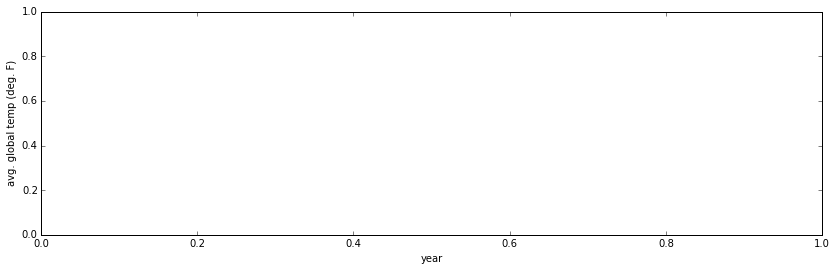

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(14, 4), dpi=500)
x = years
y = temps
z = 1
plt.figure(figsize=(14, 4), dpi=500)
plt.ylabel('avg. global temp (deg. F)')
plt.xlabel('year')
line, = plt.plot(years[1,2], temps[1,2], '-')
#line, = plt.plot(years[z+1], temps[z+1], '-')
plt.axis([1870, 2020, 56.2, 58.6])
plt.scatter(years[1,2], temps[1,2])
#plt.scatter(years[z+1], temps[z+1])
print (' ')
print (' ')
plt.show()
print ('Figure 1. Average global temperature from 1880 to 2014 in degrees F.')
print (' ')
print (' ')
print (' ')
    
print ('Audio "sound graph" that corresponds to Figure 1.')
import IPython #this plays audio file, frequency range set above
IPython.display.Audio("warmingsince1880fromloopcode.wav")

In [ ]:
import IPython #this plays audio file, frequency range set above
IPython.display.Audio("warmingsince1880fromloopcodeFAST.wav")

In [14]:
import IPython #this plays audio file, frequency range set above
IPython.display.Audio("warmingsince1880fromloopcodeREALLYFAST.wav")

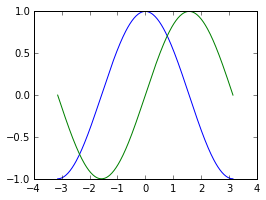

In [37]:
import pylab as pl
import numpy as np

# Create a figure of size 8x6 inches, 80 dots per inch
pl.figure(figsize=(4, 3), dpi=80)

# Create a new subplot from a grid of 1x1
pl.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# Plot cosine with a blue continuous line of width 1 (pixels)
pl.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
pl.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
pl.xlim(-4.0, 4.0)

# Set x ticks
pl.xticks(np.linspace(-4, 4, 9, endpoint=True))

# Set y limits
pl.ylim(-1.0, 1.0)

# Set y ticks
pl.yticks(np.linspace(-1, 1, 5, endpoint=True))

# Save figure using 72 dots per inch
#savefig("exercice_2.png", dpi=72)

# Show result on screen
pl.show()